In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.spatial.distance import euclidean, mahalanobis
from dtw import dtw

In [2]:
audiofile = librosa.example('sweetwaltz')

In [3]:
y, sr = librosa.load(audiofile)

## Playing Audio inside Jupyter Notebook

In [4]:
IPython.display.Audio(audiofile)

## Simple Visualization

**Sampling**

Sound is a continuous wave. We can digitise sound by breaking the continuous wave into discrete signals. This process is called sampling. Sampling converts a sound wave into a sequence of samples or a discrete-time signal.

The load functions loads the audio file and converts it into an array of values which represent the amplitude if a sample at a given point of time.

**Sampling Rate**

The sampling rate is the number of samples per second. Hz or Hertz is the unit of the sampling rate. 20 kHz is the audible range for human beings.

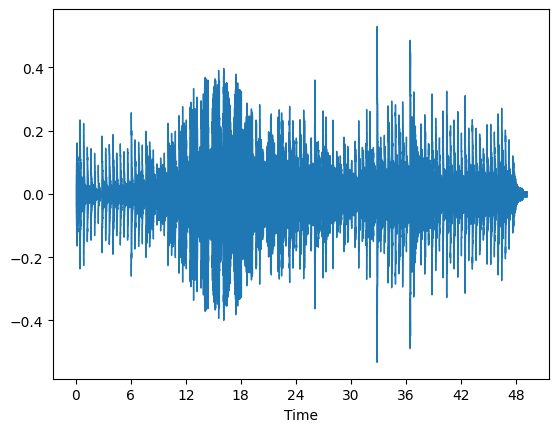

In [5]:
# plt.figure(figsize=(15,4))
librosa.display.waveshow(y, sr=sr, max_points=5000, axis='time', transpose=False)

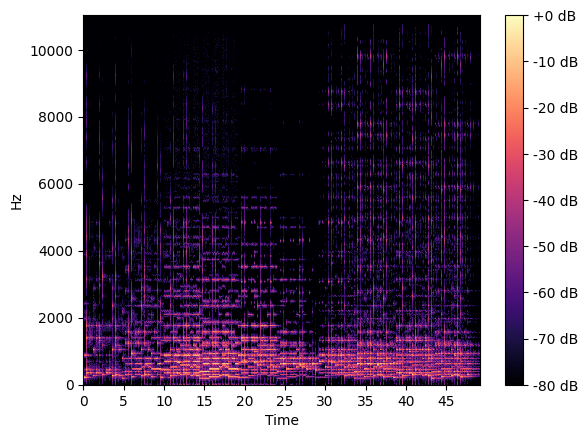

In [6]:
# https://librosa.org/doc/main/auto_examples/plot_display.html
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
plt.figure()
librosa.display.specshow(S_db, x_axis='time', y_axis='linear')
plt.colorbar(format="%+2.f dB")

## Beat Tracker

In [7]:
# audiofile = librosa.example('sweetwaltz')
# y, sr = librosa.load(audiofile)

# Run the default beat tracker
tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)

print(f"Estimated {round(tempo)} BPM")

# Convert the frame indices of beat events into timestamps
beat_times = librosa.frames_to_time(beat_frames, sr=sr)

Estimated 152 BPM


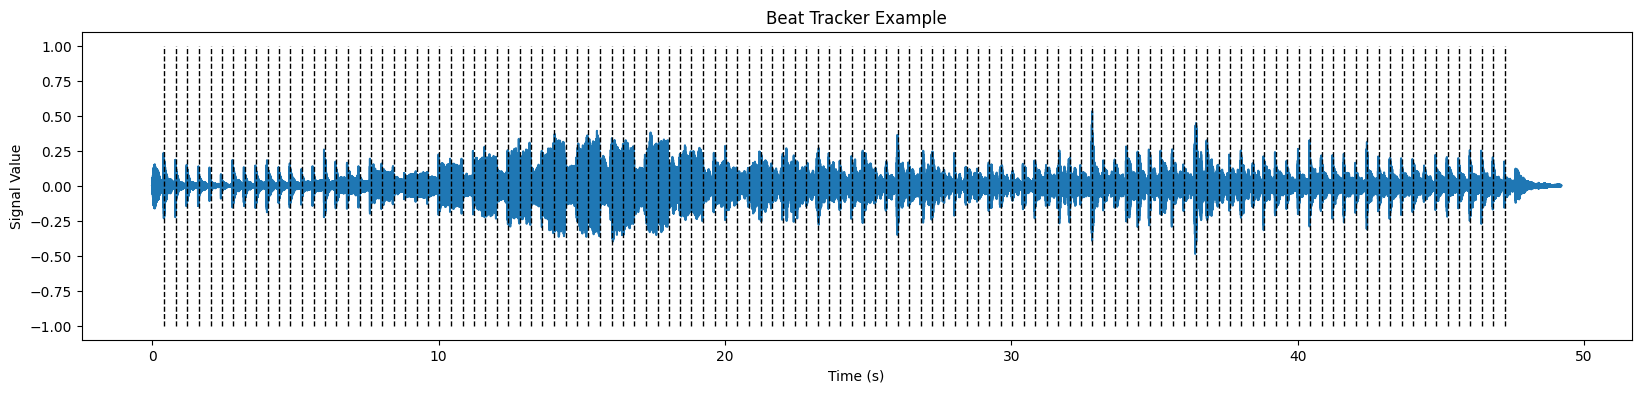

In [8]:
audio_len = len(y) / sr
timestamps = np.linspace(0, audio_len, num=len(y))

plt.figure(figsize=(20, 4))
plt.plot(timestamps, y)
plt.title("Beat Tracker Example")
plt.ylabel('Signal Value')
plt.xlabel('Time (s)')
plt.vlines([beat_times], ymin=-1, ymax=1, linestyles="dashed", colors="black", linewidth=1)
# plt.xlim(0, 10)
plt.show()

## Tempogram

[Text(0.5, 1.0, 'Tempogram ratio')]

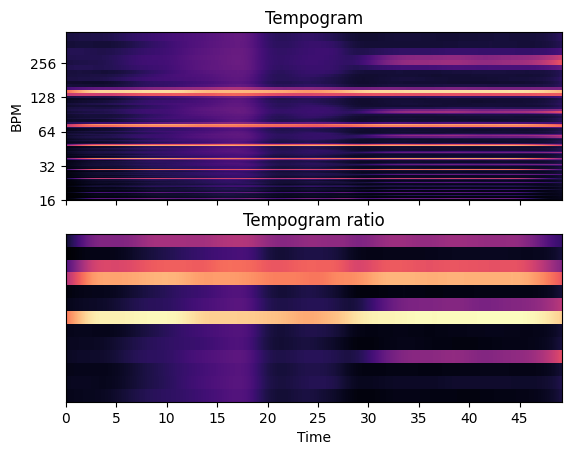

In [9]:
tempogram = librosa.feature.tempogram(y=y, sr=sr)
tgr = librosa.feature.tempogram_ratio(tg=tempogram, sr=sr)
fig, ax = plt.subplots(nrows=2, sharex=True)
librosa.display.specshow(tempogram, x_axis='time', y_axis='tempo',
                         ax=ax[0])
librosa.display.specshow(tgr, x_axis='time', ax=ax[1])
ax[0].label_outer()
ax[0].set(title="Tempogram")
ax[1].set(title="Tempogram ratio")

## Chromagram

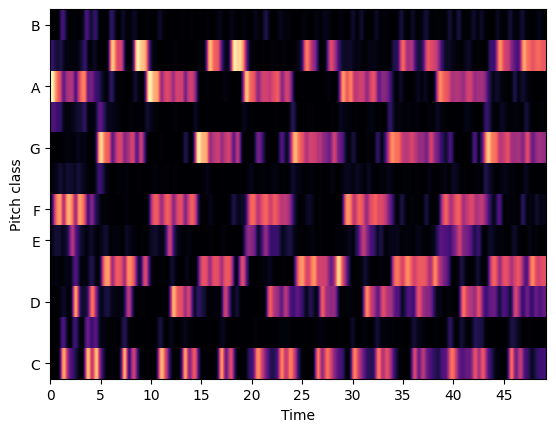

In [10]:
chroma = librosa.feature.chroma_cens(y=y, sr=sr)
librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
plt.show()

## Mel Frequency Cepstral Coefficent and DTW

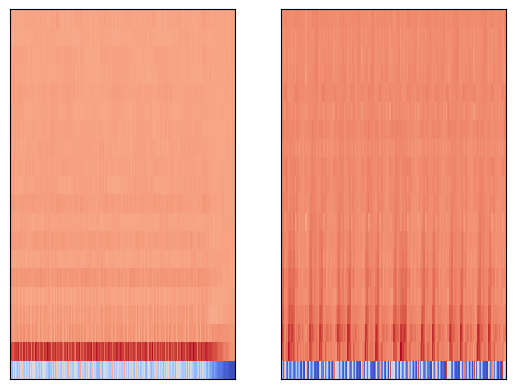

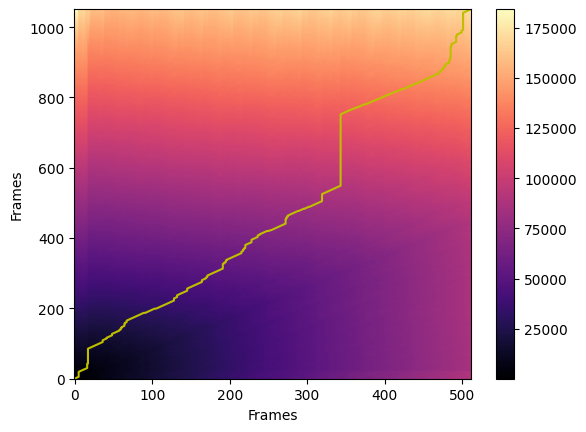

Cost: 172374.33


In [13]:
#https://github.com/d4r3topk/comparing-audio-files-python/blob/master/mfcc.py
# Calculating MFCC's and comparing by DTW using python in-built modules

#Loading audio files
y1, sr1 = librosa.load("..\\data\\pluck-loop-91bpm-132429.mp3") 
y2, sr2 = librosa.load("..\\data\\live-hip-hop-loop-81bpm-131102.mp3") 

# Showing multiple plots using subplot
plt.subplot(1, 2, 1) 
mfcc1 = librosa.feature.mfcc(y=y1,sr=sr1)   # Computing MFCC values
librosa.display.specshow(mfcc1)

plt.subplot(1, 2, 2)
mfcc2 = librosa.feature.mfcc(y=y2, sr=sr2)
librosa.display.specshow(mfcc2)

D, wp = librosa.sequence.dtw(mfcc1, mfcc2, subseq=False, metric="euclidean")

fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='frames', y_axis='frames', ax=ax)
# ax.imshow(D)
ax.plot(wp[:, 1], wp[:, 0], label="optimal path", color="y")
fig.colorbar(img)
plt.show()

print(f"Cost: {D[-1,-1]:.2f}")